# 1. Collection

In [587]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

sns.set_theme()

In [588]:
with open("allterraincranes.json") as f:
    data = json.load(f)

In [589]:
df = pd.DataFrame(columns=[ 'category',
                            'brand',
                            'model',
                            'capacity_ust',
                            'serial_number',
                            'year',
                            'hours',
                            'price',
                            'condition',
                            'location',
                            'description',
                            'link'])

# convert JSON to CSV
for i in range(0, len(data)):
    currentItem = data[i]
    df.loc[i] = [data[i]['Category'],
                 data[i]['Manufacturer'],
                 data[i]['Model'],
                 data[i]['Ton (USt)'],
                 data[i]['Serial Number'],
                 data[i]['Year'], 
                 data[i]['Hours'],
                 data[i]['price'],
                 data[i]['Condition'],
                 data[i]['location'],
                 data[i]['description'],
                 data[i]['link']]
df

,category,brand,model,capacity_ust,serial_number,year,hours,price,condition,location,description,link
0,\nAll Terrain Cranes,\nGrove,\nGMK6350,350.00,None,\n2004,None,"$750,000 USD",\nUsed,"Location: Austin, TX, USA","350 Ton, 197' Main Boom, 36'-62' Swing Away Ji...",https://cranemarket.com/2004-grove-gmk6350-350...
1,\nAll Terrain Cranes,\nTadano,\nATF 220G-5,250.00,None,\n2015,None,Price On Request,\nUsed,Location: United States,"13,000| 1,300| 4,000|EXCELLENT CONDITION / CR...",https://cranemarket.com/tadano-atf-220g-5-250-...
2,\nAll Terrain Cranes,\nLiebherr,\nLTM 1250-5.1,265.00,None,\n2017,None,Price On Request,\nExcellent,Location: Germany,60M (197’) Boom|\n164’ Hydraulic Offset Jib|\n...,https://cranemarket.com/liebherr-ltm-1250-5-1-...
3,\nAll Terrain Cranes,\nGrove,\nGMK4090,100.00,\n40904044,\n2020,\n468,Price On Request,\nExcellent,"Location: 500 World Commerce Pkwy, St. Augusti...",SN 40904044 WITH 8X6X8 LHD MERCEDES BENZ POWE...,https://cranemarket.com/grove-gmk4090-90-ton-a...
4,\nAll Terrain Cranes,\nGrove,\nGMK4090,100.00,\n40904045,\n2020,\n373,Price On Request,\nLike_New,"Location: 10421 Fern Hill Dr, Riverview, Flori...",", WITH 8X6X8 LHD MERCEDES BENZ POWER, 21M HYDR...",https://cranemarket.com/grove-gmk4090-100-ton-...
...,...,...,...,...,...,...,...,...,...,...,...,...
492,\nAll Terrain Cranes,\nTadano,\nAC 5.220L-1,245.00,None,\n2022,None,Price On Request,\nNew,"Location: Syracuse, NY, USA",New 2021 Tadano AC 5.220L-1 formally the Demag...,https://cranemarket.com/tadano-ac-5-220l-1-245...
493,\nAll Terrain Cranes,\nLiebherr,\nLTM 1750-9.1,900.00,None,\n2015,"\n5,473",Price On Request,\nUsed,"Location: Oklahoma, USA",,https://cranemarket.com/2015-liebherr-ltm-1750...
494,\nAll Terrain Cranes,\nGrove,\nGMK3060L-1,65.00,\n3060-7164,\n2022,\n27,Price On Request,\nNew,"Location: South Easton, Easton, MA, USA","One (1) New 2022 Grove GMK3060L-1, S/N: 3060-7...",https://cranemarket.com/2022-grove-gmk3060l-1-...
495,\nAll Terrain Cranes,\nLiebherr,\nLTM 1100-4.2,120.00,None,\n2015,None,Price On Request,\nUsed,Location: United States,"42,600 MILES|LOWER HOURS 2,820|UPPER HOURS 6,1...",https://cranemarket.com/liebherr-ltm-1100-4-2-...


In [590]:
# Get data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 0 to 496
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category       497 non-null    object
 1   brand          497 non-null    object
 2   model          497 non-null    object
 3   capacity_ust   495 non-null    object
 4   serial_number  121 non-null    object
 5   year           492 non-null    object
 6   hours          186 non-null    object
 7   price          497 non-null    object
 8   condition      497 non-null    object
 9   location       497 non-null    object
 10  description    497 non-null    object
 11  link           497 non-null    object
dtypes: object(12)
memory usage: 50.5+ KB


# 2. Cleaning

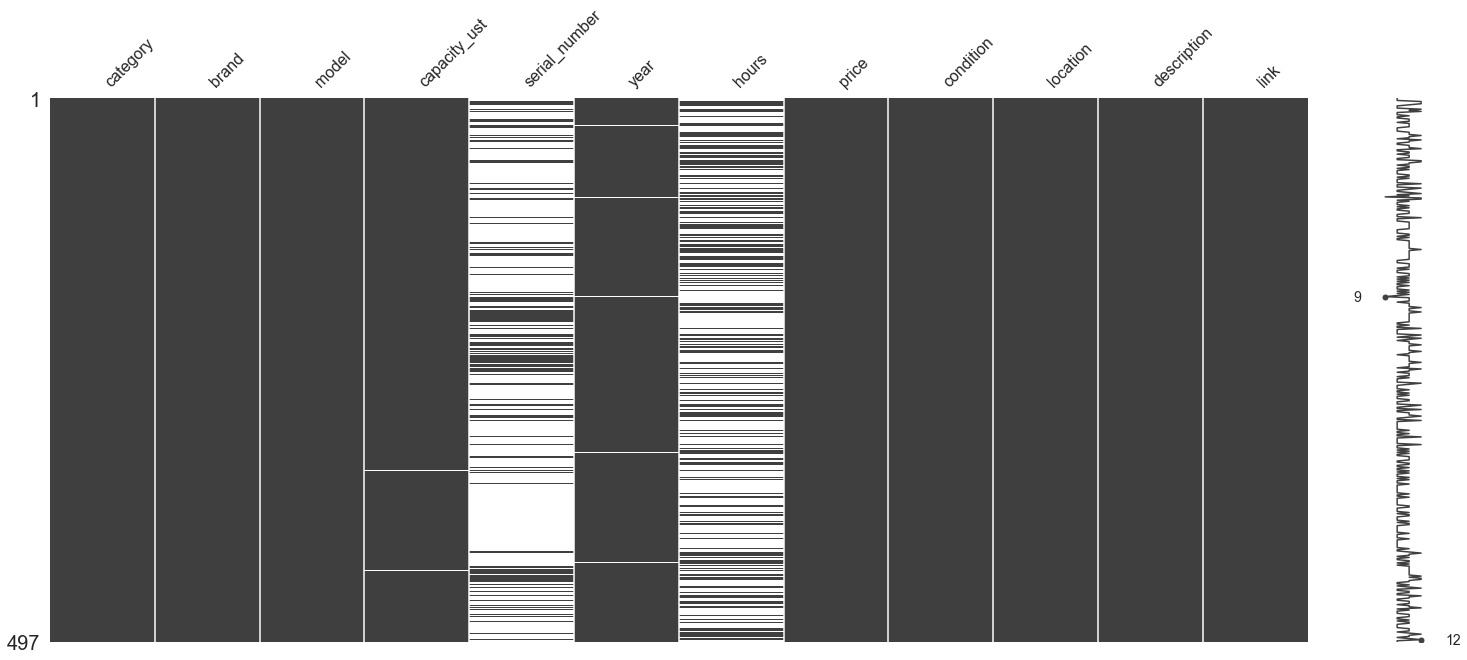

category           0
brand              0
model              0
capacity_ust       2
serial_number    376
year               5
hours            311
price              0
condition          0
location           0
description        0
link               0
dtype: int64

In [591]:
# Missingno: Useful package for visualizing and understanding missing data
# In terminal: pip3 install missingno
import missingno as msno

# Plot missingness
msno.matrix(df)
plt.show()

# Total empty values by column
df.isna().sum()

In [592]:
# Drop rows with 'For Rent Only' & 'Auction' values in price column. Because we only focus in products to sold not for rent
df.drop(df[(df['price'] == 'For Rent Only') | (df['price'] == 'Auction')].index, inplace = True)
df

,category,brand,model,capacity_ust,serial_number,year,hours,price,condition,location,description,link
0,\nAll Terrain Cranes,\nGrove,\nGMK6350,350.00,None,\n2004,None,"$750,000 USD",\nUsed,"Location: Austin, TX, USA","350 Ton, 197' Main Boom, 36'-62' Swing Away Ji...",https://cranemarket.com/2004-grove-gmk6350-350...
1,\nAll Terrain Cranes,\nTadano,\nATF 220G-5,250.00,None,\n2015,None,Price On Request,\nUsed,Location: United States,"13,000| 1,300| 4,000|EXCELLENT CONDITION / CR...",https://cranemarket.com/tadano-atf-220g-5-250-...
2,\nAll Terrain Cranes,\nLiebherr,\nLTM 1250-5.1,265.00,None,\n2017,None,Price On Request,\nExcellent,Location: Germany,60M (197’) Boom|\n164’ Hydraulic Offset Jib|\n...,https://cranemarket.com/liebherr-ltm-1250-5-1-...
3,\nAll Terrain Cranes,\nGrove,\nGMK4090,100.00,\n40904044,\n2020,\n468,Price On Request,\nExcellent,"Location: 500 World Commerce Pkwy, St. Augusti...",SN 40904044 WITH 8X6X8 LHD MERCEDES BENZ POWE...,https://cranemarket.com/grove-gmk4090-90-ton-a...
4,\nAll Terrain Cranes,\nGrove,\nGMK4090,100.00,\n40904045,\n2020,\n373,Price On Request,\nLike_New,"Location: 10421 Fern Hill Dr, Riverview, Flori...",", WITH 8X6X8 LHD MERCEDES BENZ POWER, 21M HYDR...",https://cranemarket.com/grove-gmk4090-100-ton-...
...,...,...,...,...,...,...,...,...,...,...,...,...
492,\nAll Terrain Cranes,\nTadano,\nAC 5.220L-1,245.00,None,\n2022,None,Price On Request,\nNew,"Location: Syracuse, NY, USA",New 2021 Tadano AC 5.220L-1 formally the Demag...,https://cranemarket.com/tadano-ac-5-220l-1-245...
493,\nAll Terrain Cranes,\nLiebherr,\nLTM 1750-9.1,900.00,None,\n2015,"\n5,473",Price On Request,\nUsed,"Location: Oklahoma, USA",,https://cranemarket.com/2015-liebherr-ltm-1750...
494,\nAll Terrain Cranes,\nGrove,\nGMK3060L-1,65.00,\n3060-7164,\n2022,\n27,Price On Request,\nNew,"Location: South Easton, Easton, MA, USA","One (1) New 2022 Grove GMK3060L-1, S/N: 3060-7...",https://cranemarket.com/2022-grove-gmk3060l-1-...
495,\nAll Terrain Cranes,\nLiebherr,\nLTM 1100-4.2,120.00,None,\n2015,None,Price On Request,\nUsed,Location: United States,"42,600 MILES|LOWER HOURS 2,820|UPPER HOURS 6,1...",https://cranemarket.com/liebherr-ltm-1100-4-2-...


In [593]:
# Cleaning all 'category' column

# Scan
df['category'].describe()
df['category'].unique()

# Clean
df['category'] = df['category'].str.strip('\n')
df['category'] = df['category'].str.strip(' ')

# # Check
# df['category'].describe()
# df['category'].unique()

In [594]:
# Cleaning all 'brand' column

# Scan
df['brand'].describe()
df['brand'].unique()

# Clean
df['brand'] = df['brand'].str.strip('\n')
df['brand'] = df['brand'].str.strip(' ')
df['brand'] = df['brand'].str.strip('\t')

# # Check
# df['brand'].describe()
# df['brand'].unique()

In [595]:
# Cleaning all 'model' column

# Scan
df['model'].describe()
df['model'].unique()

# Clean
df['model'] = df['model'].str.strip('\n')
df['model'] = df['model'].str.strip(' ')

# # Check
# df['model'].describe()
# df['model'].unique()

In [596]:
# Cleaning all 'capacity_ust' column

# Scan
df['capacity_ust'].describe()
df['capacity_ust'].unique()

# Clean
df['capacity_ust'] = df['capacity_ust'].str.strip(' ')

# # Check
# df['capacity_ust'].describe()
# df['capacity_ust'].unique()

In [597]:
# Cleaning all 'serial_number' column

# Scan
df['serial_number'].describe()
df['serial_number'].unique()

# Clean
df['serial_number'] = df['serial_number'].str.strip('\n')
df['serial_number'] = df['serial_number'].str.strip(' ')

# # Check
# df['serial_number'].describe()
# df['serial_number'].unique()

In [598]:
# Cleaning all 'year' column

# Scan
df['year'].describe()
df['year'].unique()

# Clean
df['year'] = df['year'].str.strip('\n')
df['year'] = df['year'].str.strip(' ')

# # Check
# df['year'].describe()
# df['year'].unique()

In [599]:
# Cleaning all 'hours' column

# Scan
df['hours'].describe()
df['hours'].unique()

# Clean
df['hours'] = df['hours'].str.replace('…','')
df['hours'] = df['hours'].str.rstrip('+/- ')
df['hours'] = df['hours'].str.strip('\n ')
df['hours'] = df['hours'].str.split(' ').str[0] # to clean from a specific character to the right side
df['hours'] = df['hours'].str.replace(',', '')
df['hours'] = df['hours'].str.replace('.', '')

# # Check
# df['hours'].describe()
# df['hours'].unique()

/var/folders/zb/60dzf9rs2g5dzbn8q93wz0hw0000gn/T/ipykernel_7041/656103455.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['hours'] = df['hours'].str.replace('.', '')


In [600]:
# Cleaning all 'price' column

# Scan
df['price'].describe()
df['price'].unique()

# Clean
df['price'] = df['price'].str.replace('Price On Request', str(np.nan))
df['price'] = df['price'].str.strip('\n')
df['price'] = df['price'].str.strip('EUR')
df['price'] = df['price'].str.strip('USD')
df['price'] = df['price'].str.strip('CAD')
df['price'] = df['price'].str.strip('$')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].str.strip('.')
df['price'] = df['price'].str.strip(' ')

# # Check
# df['price'].describe()
# df['price'].unique()

In [601]:
# Cleaning all 'condition' column

# Scan
df['condition'].describe()
df['condition'].unique()

# Clean
df['condition'] = df['condition'].str.replace('Like ', '')
df['condition'] = df['condition'].str.replace('Like_', '')
df['condition'] = df['condition'].str.strip('\n')
df['condition'] = df['condition'].str.strip(' ')
df['condition'] = df['condition'].str.strip('\t')

# # Check
# df['condition'].describe()
# df['condition'].unique()

In [602]:
# Cleaning all 'location' column

# Scan
df['location'].describe()
df['location'].unique()

# Clean
df['location'] = df['location'].str.replace('Location: ', '')

# Create new country column with territory dictionaries
us = {
    "USA": "US",
    "United States": "USA",
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
    "Columbia": "Missouri",
    "Angle Rd": "FL"
}

canada = {
    'Canada': 'CA',
    'Alberta': 'AB',
    'British Columbia': 'BC',
    'Manitoba': 'MB',
    'New Brunswick': 'NB',
    'Newfoundland and Labrador': 'NL',
    'Northwest Territories': 'NT',
    'Nova Scotia': 'NS',
    'Nunavut': 'NU',
    'Ontario': 'ON',
    'Prince Edward Island': 'PE',
    'Quebec': 'QC',
    'Saskatchewan': 'SK',
    'Yukon': 'YT'
}

# Create the country column
df['country'] = df['location'].apply(lambda x: 'USA' if any([i in x for i in (list(us.keys()) + list(us.values()))]) else x)
df['country'] = df['country'].apply(lambda x: 'Canada' if any([i in x for i in (list(canada.keys()) + list(canada.values()))]) else x)
df['country'] = df['country'].str.rsplit(', ').str[-1]

# # Check
# df['country'].describe()
# df['country'].unique()



In [603]:
# Replace 'location' to 'country' column
df = df[['category', 'brand', 'model', 'capacity_ust', 'serial_number', 'year', 'hours', 'price','condition', 'country', 'description', 'link']]
df

,category,brand,model,capacity_ust,serial_number,year,hours,price,condition,country,description,link
0,All Terrain Cranes,Grove,GMK6350,350.00,None,2004,None,750000,Used,USA,"350 Ton, 197' Main Boom, 36'-62' Swing Away Ji...",https://cranemarket.com/2004-grove-gmk6350-350...
1,All Terrain Cranes,Tadano,ATF 220G-5,250.00,None,2015,None,nan,Used,USA,"13,000| 1,300| 4,000|EXCELLENT CONDITION / CR...",https://cranemarket.com/tadano-atf-220g-5-250-...
2,All Terrain Cranes,Liebherr,LTM 1250-5.1,265.00,None,2017,None,nan,Excellent,Germany,60M (197’) Boom|\n164’ Hydraulic Offset Jib|\n...,https://cranemarket.com/liebherr-ltm-1250-5-1-...
3,All Terrain Cranes,Grove,GMK4090,100.00,40904044,2020,468,nan,Excellent,USA,SN 40904044 WITH 8X6X8 LHD MERCEDES BENZ POWE...,https://cranemarket.com/grove-gmk4090-90-ton-a...
4,All Terrain Cranes,Grove,GMK4090,100.00,40904045,2020,373,nan,New,USA,", WITH 8X6X8 LHD MERCEDES BENZ POWER, 21M HYDR...",https://cranemarket.com/grove-gmk4090-100-ton-...
...,...,...,...,...,...,...,...,...,...,...,...,...
492,All Terrain Cranes,Tadano,AC 5.220L-1,245.00,None,2022,None,nan,New,USA,New 2021 Tadano AC 5.220L-1 formally the Demag...,https://cranemarket.com/tadano-ac-5-220l-1-245...
493,All Terrain Cranes,Liebherr,LTM 1750-9.1,900.00,None,2015,5473,nan,Used,USA,,https://cranemarket.com/2015-liebherr-ltm-1750...
494,All Terrain Cranes,Grove,GMK3060L-1,65.00,3060-7164,2022,27,nan,New,USA,"One (1) New 2022 Grove GMK3060L-1, S/N: 3060-7...",https://cranemarket.com/2022-grove-gmk3060l-1-...
495,All Terrain Cranes,Liebherr,LTM 1100-4.2,120.00,None,2015,None,nan,Used,USA,"42,600 MILES|LOWER HOURS 2,820|UPPER HOURS 6,1...",https://cranemarket.com/liebherr-ltm-1100-4-2-...


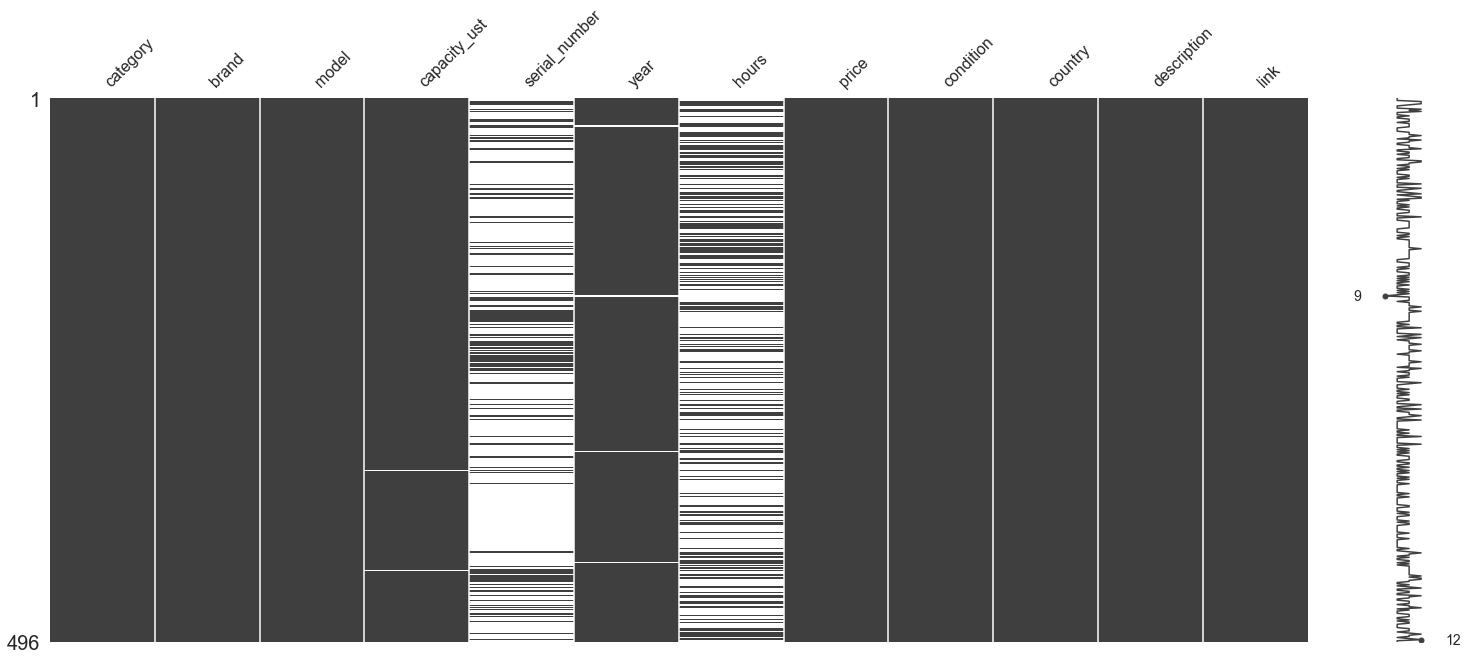

category           0
brand              0
model              0
capacity_ust       2
serial_number    375
year               4
hours            310
price              0
condition          0
country            0
description        0
link               0
dtype: int64

In [604]:
# Plot missingness
msno.matrix(df)
plt.show()

# Total empty values per column
df.isna().sum()

In [605]:
# Convert columns to category data type, to do this is necessary to make a copy of df
df = df.copy()

columns_to_category =  ['category', 'brand', 'model', 'condition', 'country']
df[columns_to_category] = df[columns_to_category].apply(lambda x: x.astype('category'))

columns_to_float = ['capacity_ust', 'year', 'hours', 'price']
df[columns_to_float] = df[columns_to_float].apply(lambda x: x.astype('float'))

 #
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496 entries, 0 to 496
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   category       496 non-null    category
 1   brand          496 non-null    category
 2   model          496 non-null    category
 3   capacity_ust   494 non-null    float64 
 4   serial_number  121 non-null    object  
 5   year           492 non-null    float64 
 6   hours          186 non-null    float64 
 7   price          132 non-null    float64 
 8   condition      496 non-null    category
 9   country        496 non-null    category
 10  description    496 non-null    object  
 11  link           496 non-null    object  
dtypes: category(5), float64(4), object(3)
memory usage: 41.0+ KB


# 3. Exploratory Data Analysis

# 3.1. EDA Full Market (with empty values in 'Price' column)

In [606]:
# Read DataFrame, keeping in mind that price rows with 0 values were not removed
df

,category,brand,model,capacity_ust,serial_number,year,hours,price,condition,country,description,link
0,All Terrain Cranes,Grove,GMK6350,350.0,None,2004.0,NaN,750000.0,Used,USA,"350 Ton, 197' Main Boom, 36'-62' Swing Away Ji...",https://cranemarket.com/2004-grove-gmk6350-350...
1,All Terrain Cranes,Tadano,ATF 220G-5,250.0,None,2015.0,NaN,NaN,Used,USA,"13,000| 1,300| 4,000|EXCELLENT CONDITION / CR...",https://cranemarket.com/tadano-atf-220g-5-250-...
2,All Terrain Cranes,Liebherr,LTM 1250-5.1,265.0,None,2017.0,NaN,NaN,Excellent,Germany,60M (197’) Boom|\n164’ Hydraulic Offset Jib|\n...,https://cranemarket.com/liebherr-ltm-1250-5-1-...
3,All Terrain Cranes,Grove,GMK4090,100.0,40904044,2020.0,468.0,NaN,Excellent,USA,SN 40904044 WITH 8X6X8 LHD MERCEDES BENZ POWE...,https://cranemarket.com/grove-gmk4090-90-ton-a...
4,All Terrain Cranes,Grove,GMK4090,100.0,40904045,2020.0,373.0,NaN,New,USA,", WITH 8X6X8 LHD MERCEDES BENZ POWER, 21M HYDR...",https://cranemarket.com/grove-gmk4090-100-ton-...
...,...,...,...,...,...,...,...,...,...,...,...,...
492,All Terrain Cranes,Tadano,AC 5.220L-1,245.0,None,2022.0,NaN,NaN,New,USA,New 2021 Tadano AC 5.220L-1 formally the Demag...,https://cranemarket.com/tadano-ac-5-220l-1-245...
493,All Terrain Cranes,Liebherr,LTM 1750-9.1,900.0,None,2015.0,5473.0,NaN,Used,USA,,https://cranemarket.com/2015-liebherr-ltm-1750...
494,All Terrain Cranes,Grove,GMK3060L-1,65.0,3060-7164,2022.0,27.0,NaN,New,USA,"One (1) New 2022 Grove GMK3060L-1, S/N: 3060-7...",https://cranemarket.com/2022-grove-gmk3060l-1-...
495,All Terrain Cranes,Liebherr,LTM 1100-4.2,120.0,None,2015.0,NaN,NaN,Used,USA,"42,600 MILES|LOWER HOURS 2,820|UPPER HOURS 6,1...",https://cranemarket.com/liebherr-ltm-1100-4-2-...


In [607]:
# Define top values for sns plots with df

# Define top level value
top = 5

# Define top index
brand_top_index = pd.DataFrame(df['brand'].value_counts().sort_values(ascending=False)).index[:top]
model_top_index = pd.DataFrame(df['model'].value_counts().sort_values(ascending=False)).index[:top]
capacity_ust_top_index = pd.DataFrame(df['capacity_ust'].value_counts().sort_values(ascending=False)).index[:top]
year_top_index = pd.DataFrame(df['year'].value_counts().sort_values(ascending=False)).index[:top]
country_top_index = pd.DataFrame(df['country'].value_counts().sort_values(ascending=False)).index[:top]
condition_top_index = pd.DataFrame(df['condition'].value_counts().sort_values(ascending=False)).index[:top]

# Defince top index values
brand_top_values = df['brand'].value_counts().sort_values(ascending=False).values[:top]
model_top_values = df['model'].value_counts().sort_values(ascending=False).values[:top]
capacity_top_values = df['capacity_ust'].value_counts().sort_values(ascending=False).values[:top]
year_top_values = df['year'].value_counts().sort_values(ascending=False).values[:top]
country_top_values = df['country'].value_counts().sort_values(ascending=False).values[:top]
condition_top_values = df['condition'].value_counts().sort_values(ascending=False).values[:top]

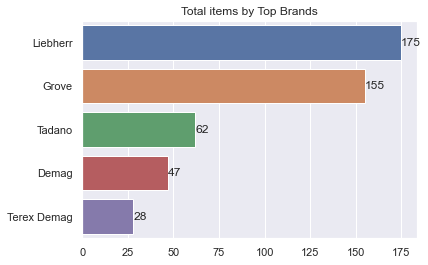

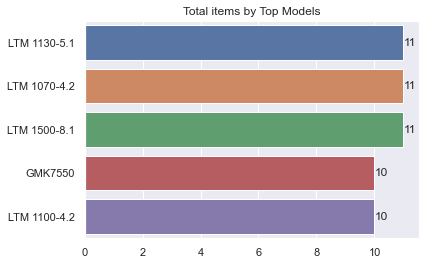

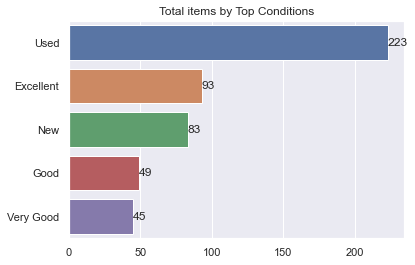

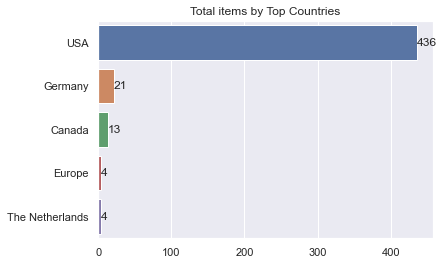

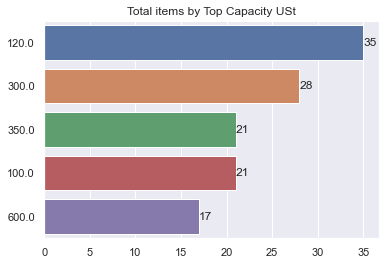

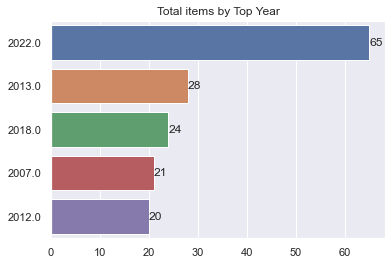

,capacity_ust,year,hours,price
count,494.000000,492.000000,186.000000,1.320000e+02
mean,233.821862,2010.859756,7536.053763,6.385014e+05
std,187.653717,8.431263,5607.455812,5.645787e+05
min,22.000000,1989.000000,10.000000,3.750000e+04
25%,110.000000,2005.000000,3015.250000,2.474992e+05
50%,170.000000,2012.000000,6501.000000,5.050000e+05
75%,300.000000,2018.000000,11485.750000,8.750000e+05
max,1350.000000,2023.000000,29915.000000,3.300000e+06


In [608]:
# Categorical Plots

# Keeping in mind that price rows with 0 values were not removed
# With rows with 0 values is not possible to convert data to int (for now)

# Top Brands
top_brand_plot = sns.countplot(y='brand', data=df, order=brand_top_index)
top_brand_plot.set(title='Total items by Top Brands', xlabel=None, ylabel=None)
top_brand_plot.bar_label(container=top_brand_plot.containers[0], labels=brand_top_values)
plt.show()

# Top Models
top_model_plot = sns.countplot(y='model', data=df, order=model_top_index)
top_model_plot.set(title='Total items by Top Models', xlabel=None, ylabel=None)
top_model_plot.bar_label(container=top_model_plot.containers[0], labels=model_top_values)
plt.show()

# Top Conditions
top_condition_plot = sns.countplot(y='condition', data=df, order=condition_top_index)
top_condition_plot.set(title='Total items by Top Conditions', xlabel=None, ylabel=None)
top_condition_plot.bar_label(container=top_condition_plot.containers[0], labels=condition_top_values)
plt.show()

# Top Countries
top_countries_plot = sns.countplot(y='country', data=df, order=country_top_index)
top_countries_plot.set(title='Total items by Top Countries', xlabel=None, ylabel=None)
top_countries_plot.bar_label(container=top_countries_plot.containers[0], labels=country_top_values)
plt.show()

# Top Capacity USt
top_capacity_ust_plot = sns.countplot(y='capacity_ust', data=df, order=capacity_ust_top_index)
top_capacity_ust_plot.set(title='Total items by Top Capacity USt', xlabel=None, ylabel=None)
top_capacity_ust_plot.bar_label(container=top_capacity_ust_plot.containers[0], labels=capacity_top_values)
plt.show()

# Top Year
top_year_plot = sns.countplot(y='year', data=df, order=year_top_index)
top_year_plot.set(title='Total items by Top Year', xlabel=None, ylabel=None)
top_year_plot.bar_label(container=top_year_plot.containers[0], labels=year_top_values)
plt.show()

df_describe = pd.DataFrame(df.describe())
df_describe

# 3.2. EDA Full Market (without empty values in 'Price' column)

In [609]:
# Extract price rows with 0 values, not consider 'serial_number' cause is not important
df_clean = df[['category', 'brand', 'model', 'capacity_ust', 'year', 'hours', 'price','condition', 'country']].dropna()

# Now that we don't have empty values, we can convert float to int
# We'll only focus on import columns for predict models

columns_to_int = ['capacity_ust', 'year', 'hours', 'price']
df_clean[columns_to_int] = df_clean[columns_to_int].apply(lambda x: x.astype('int'))
df_clean

,category,brand,model,capacity_ust,year,hours,price,condition,country
10,All Terrain Cranes,Grove,GMK5240,240,2006,12988,675000,Used,Canada
23,All Terrain Cranes,Liebherr,LTM 1400,480,1990,15900,647000,Excellent,USA
34,All Terrain Cranes,Tadano,ATF 130G-5,160,2016,2670,945000,Excellent,USA
38,All Terrain Cranes,Grove,GMK6300,300,1998,9900,345000,Very Good,USA
40,All Terrain Cranes,Grove,GMK5220,220,2013,4100,810000,Used,Germany
46,All Terrain Cranes,Grove,GMK5210,210,2000,12000,625000,Good,USA
58,All Terrain Cranes,Grove,GMK5240,240,2005,2925,650000,Good,USA
86,All Terrain Cranes,Liebherr,LTM 1400-7.1,500,2007,8261,2650000,Very Good,USA
105,All Terrain Cranes,Grove,GMK5220,220,2015,1250,750000,Used,Germany
109,All Terrain Cranes,Terex Demag,AC 250-1,300,2013,4031,1475000,Good,USA


In [610]:
# df for train_test split
df_ml = df_clean.copy()

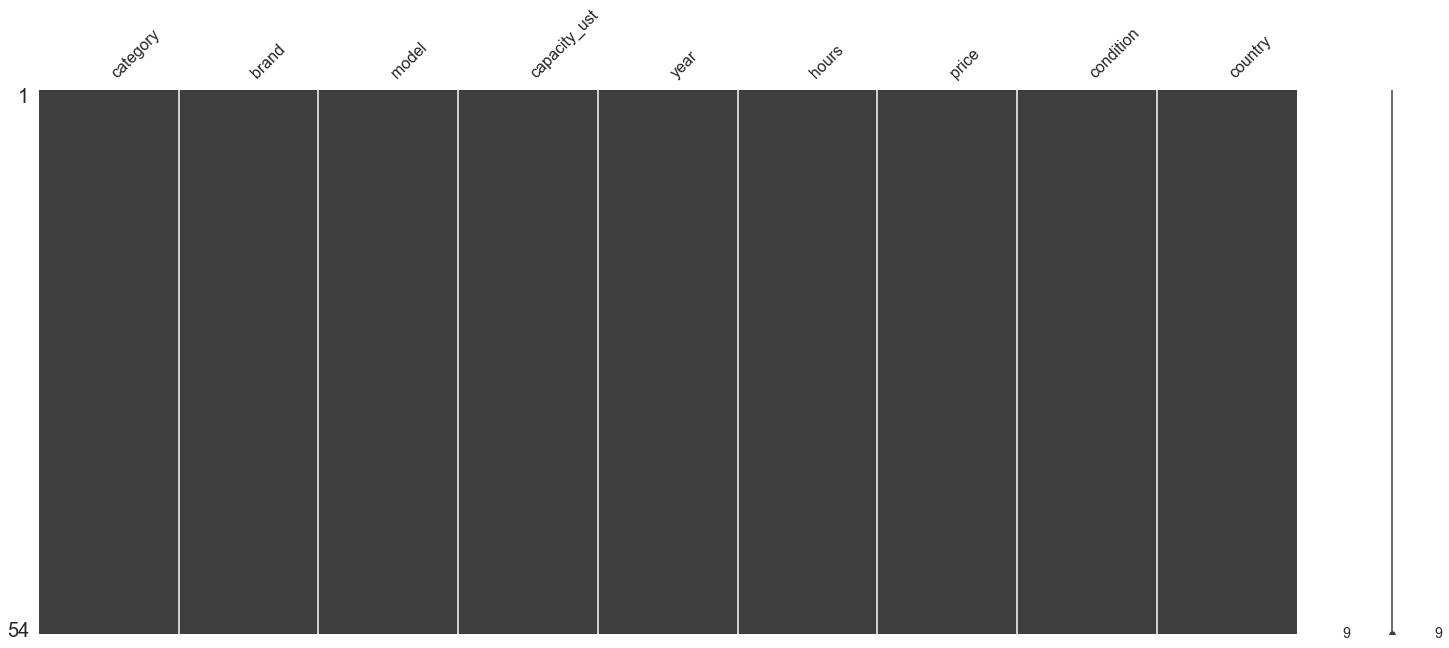

category        0
brand           0
model           0
capacity_ust    0
year            0
hours           0
price           0
condition       0
country         0
dtype: int64

In [611]:
# Plot missingness
msno.matrix(df_clean)
plt.show()

# Total empty values per column
df_clean.isna().sum()

In [612]:
# Define top values for sns plots with df_clean

# Define top level value
top = 5

# Define top index
brand_top_index2 = pd.DataFrame(df_clean['brand'].value_counts().sort_values(ascending=False)).index[:top]
model_top_index2 = pd.DataFrame(df_clean['model'].value_counts().sort_values(ascending=False)).index[:top]
capacity_ust_top_index2 = pd.DataFrame(df_clean['capacity_ust'].value_counts().sort_values(ascending=False)).index[:top]
year_top_index2 = pd.DataFrame(df_clean['year'].value_counts().sort_values(ascending=False)).index[:top]
country_top_index2 = pd.DataFrame(df_clean['country'].value_counts().sort_values(ascending=False)).index[:top]
condition_top_index2 = pd.DataFrame(df_clean['condition'].value_counts().sort_values(ascending=False)).index[:top]

# Defince top index values
brand_top_values2 = df_clean['brand'].value_counts().sort_values(ascending=False).values[:top]
model_top_values2 = df_clean['model'].value_counts().sort_values(ascending=False).values[:top]
capacity_top_values2 = df_clean['capacity_ust'].value_counts().sort_values(ascending=False).values[:top]
year_top_values2 = df_clean['year'].value_counts().sort_values(ascending=False).values[:top]
country_top_values2 = df_clean['country'].value_counts().sort_values(ascending=False).values[:top]
condition_top_values2 = df_clean['condition'].value_counts().sort_values(ascending=False).values[:top]

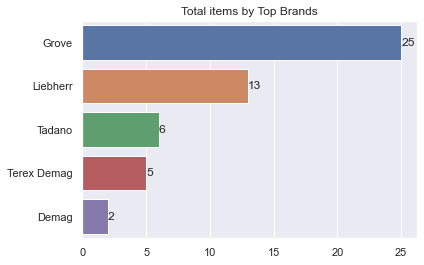

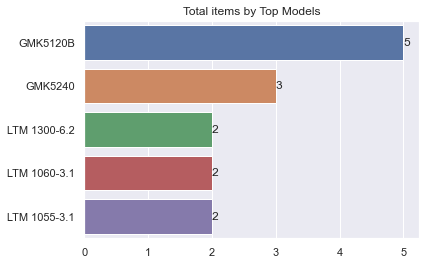

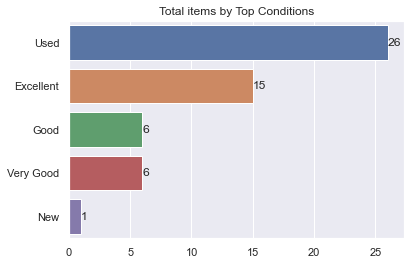

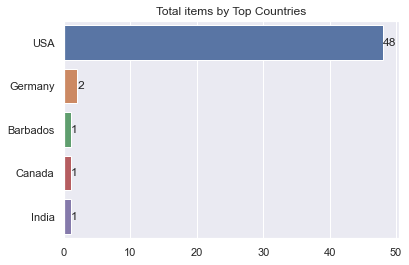

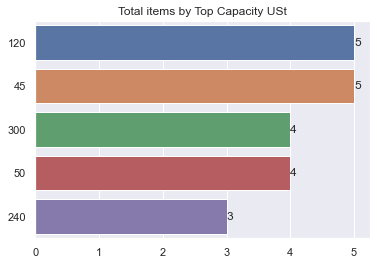

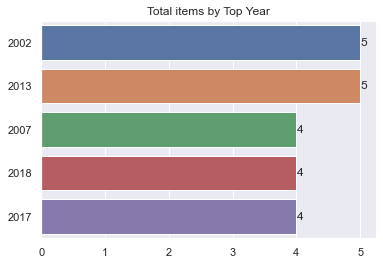

In [613]:
# Categorical Plots

# Top Brands
top_brand_plot2 = sns.countplot(y='brand', data=df_clean, order=brand_top_index2)
top_brand_plot2.set(title='Total items by Top Brands', xlabel=None, ylabel=None)
top_brand_plot2.bar_label(container=top_brand_plot2.containers[0], labels=brand_top_values2)
plt.show()

# Top Models
top_model_plot2 = sns.countplot(y='model', data=df_clean, order=model_top_index2)
top_model_plot2.set(title='Total items by Top Models', xlabel=None, ylabel=None)
top_model_plot2.bar_label(container=top_model_plot2.containers[0], labels=model_top_values2)
plt.show()

# Top Conditions
top_condition_plot2 = sns.countplot(y='condition', data=df_clean, order=condition_top_index2)
top_condition_plot2.set(title='Total items by Top Conditions', xlabel=None, ylabel=None)
top_condition_plot2.bar_label(container=top_condition_plot2.containers[0], labels=condition_top_values2)
plt.show()

# Top Countries
top_countries_plot2 = sns.countplot(y='country', data=df_clean, order=country_top_index2)
top_countries_plot2.set(title='Total items by Top Countries', xlabel=None, ylabel=None)
top_countries_plot2.bar_label(container=top_countries_plot2.containers[0], labels=country_top_values2)
plt.show()

# Top Capacity USt
top_capacity_ust_plot2 = sns.countplot(y='capacity_ust', data=df_clean, order=capacity_ust_top_index2)
top_capacity_ust_plot2.set(title='Total items by Top Capacity USt', xlabel=None, ylabel=None)
top_capacity_ust_plot2.bar_label(container=top_capacity_ust_plot2.containers[0], labels=capacity_top_values2)
plt.show()

# Top Year
top_year_plot2 = sns.countplot(y='year', data=df_clean, order=year_top_index2)
top_year_plot2.set(title='Total items by Top Year', xlabel=None, ylabel=None)
top_year_plot2.bar_label(container=top_year_plot2.containers[0], labels=year_top_values2)
plt.show()

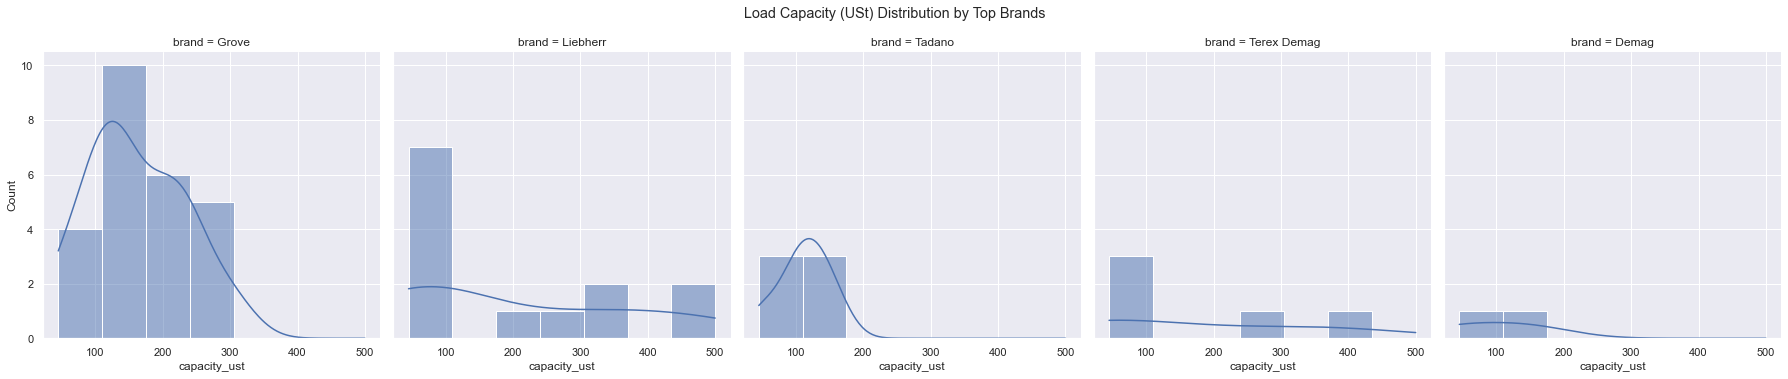

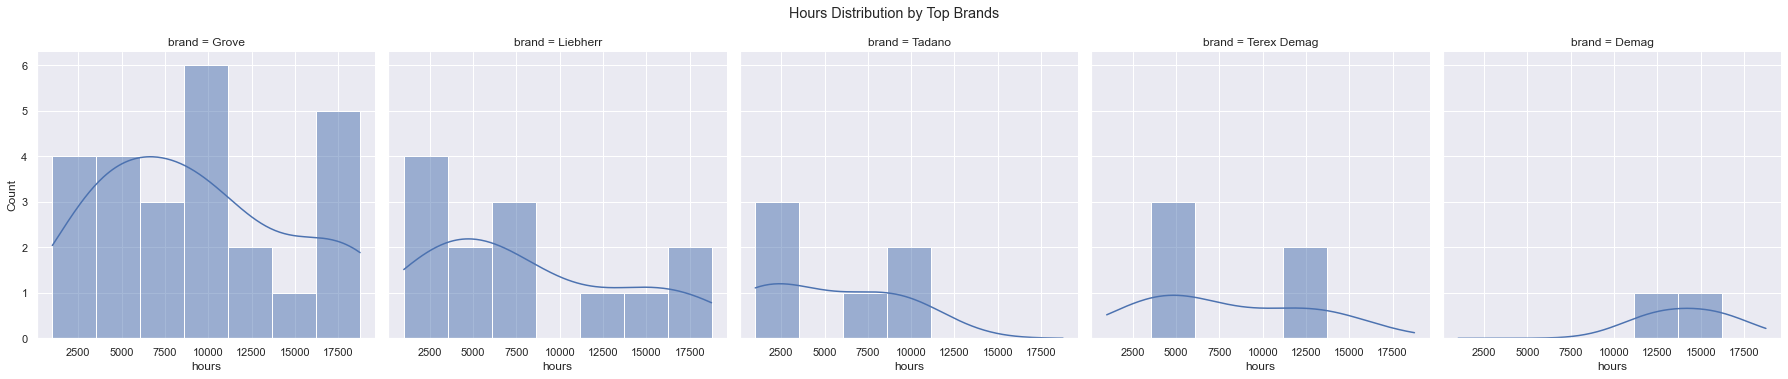

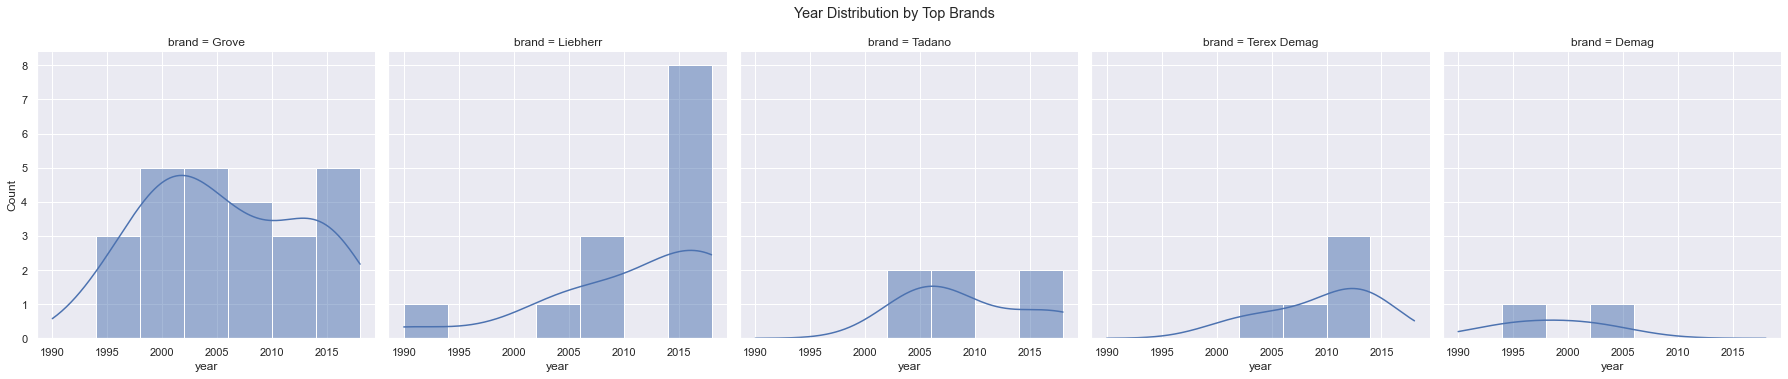

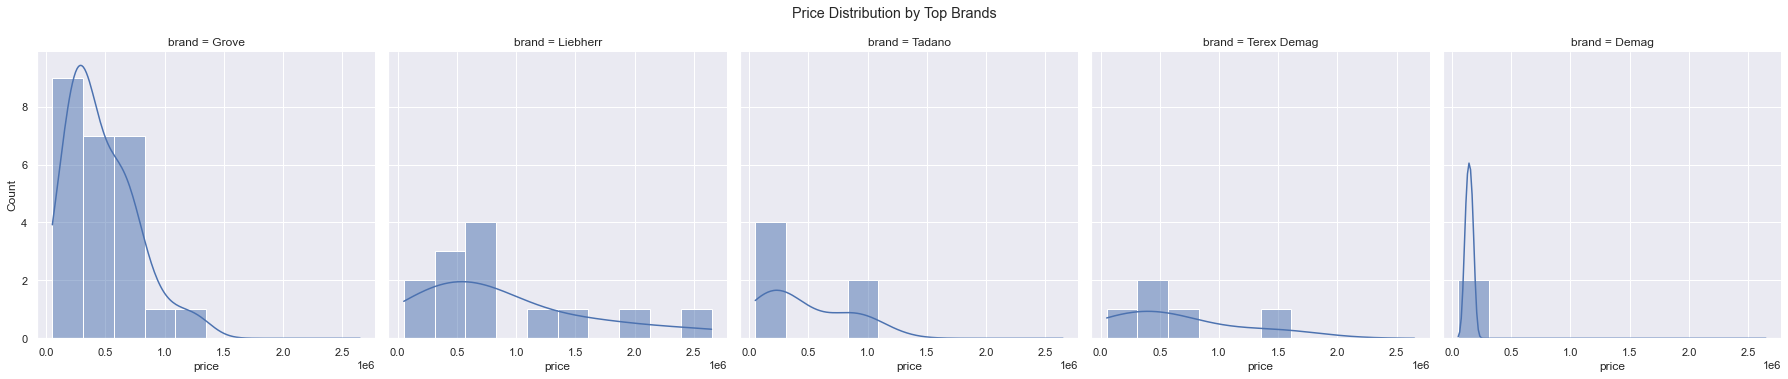

In [614]:
sns.displot(data=df_clean, x='capacity_ust', kde=True, col='brand', col_order=brand_top_index2).fig.suptitle('Load Capacity (USt) Distribution by Top Brands', y=1.05)
sns.displot(data=df_clean, x='hours', kde=True, col='brand', col_order=brand_top_index2).fig.suptitle('Hours Distribution by Top Brands', y=1.05)
sns.displot(data=df_clean, x='year', kde=True, col='brand', col_order=brand_top_index2).fig.suptitle('Year Distribution by Top Brands', y=1.05)
sns.displot(data=df_clean, x='price', kde=True, col='brand', col_order=brand_top_index2).fig.suptitle('Price Distribution by Top Brands', y=1.05)
plt.show()

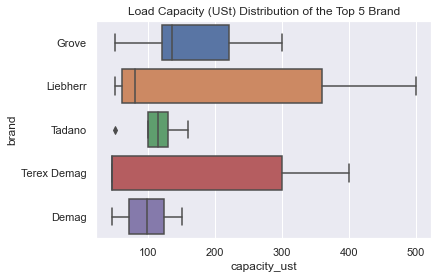

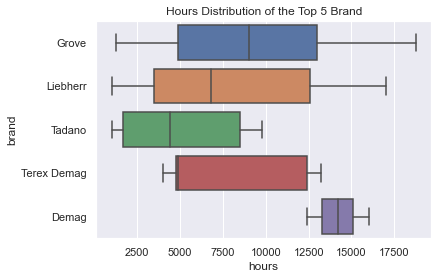

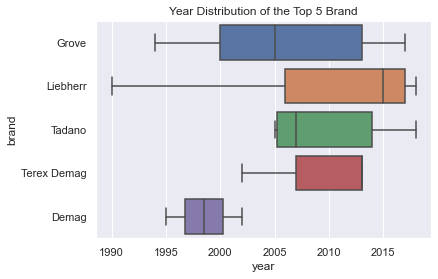

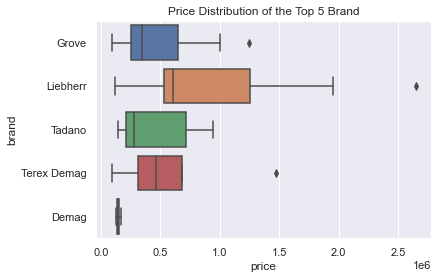

In [615]:
# Boxplots: Shows the distribution of quantitative data, See median, spread, skewness, and outliers, Facilitates comparisons between groups
sns.boxplot(x='capacity_ust', y='brand', data=df_clean, order=brand_top_index2).set(title='Load Capacity (USt) Distribution of the Top 5 Brand')
plt.show()
sns.boxplot(x='hours', y='brand', data=df_clean, order=brand_top_index2).set(title='Hours Distribution of the Top 5 Brand')
plt.show()
sns.boxplot(x='year', y='brand', data=df_clean, order=brand_top_index2).set(title='Year Distribution of the Top 5 Brand')
plt.show()
sns.boxplot(x='price', y='brand', data=df_clean, order=brand_top_index2).set(title='Price Distribution of the Top 5 Brand')
plt.show()

In [616]:
df_clean_describe = pd.DataFrame(df_clean.describe())
df_clean_describe

,capacity_ust,year,hours,price
count,54.000000,54.000000,54.000000,5.400000e+01
mean,164.500000,2007.629630,8636.574074,5.840147e+05
std,113.786916,7.809758,5403.873658,4.996334e+05
min,45.000000,1990.000000,1000.000000,5.200000e+04
25%,70.000000,2002.000000,4362.250000,2.417498e+05
50%,130.000000,2007.000000,7488.500000,4.572000e+05
75%,220.000000,2015.000000,12536.750000,7.337500e+05
max,500.000000,2018.000000,18763.000000,2.650000e+06


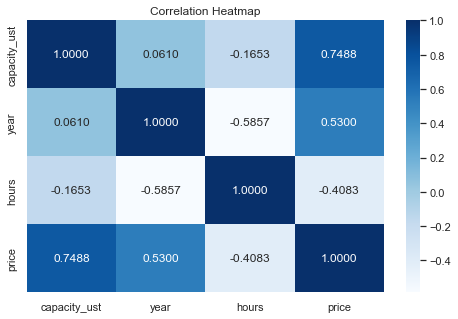

In [617]:
# Correlation matrix 
sns.set()
sns.set_palette('Blues_r')
plt.figure(figsize=(8, 5))

columns_corr = ['capacity_ust', 'year', 'hours', 'price']
subset = df_clean[columns_corr]
dataplot = sns.heatmap(subset.corr(), cmap='Blues', annot=True, fmt='.4f').set(title='Correlation Heatmap')

Text(0.5, 1.02, 'Distribution and Correlation Diagrams')

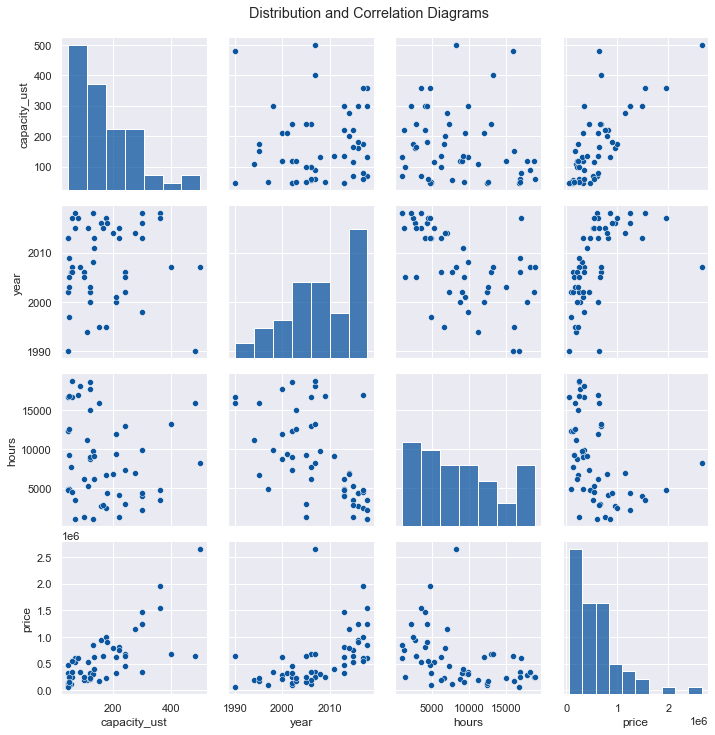

In [618]:
# Distribution matrix
g = sns.PairGrid(df_clean)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.fig.suptitle('Distribution and Correlation Diagrams', y=1.02)

{'mean': 2.1150697068701065, 'std': 0.30493953026633785}


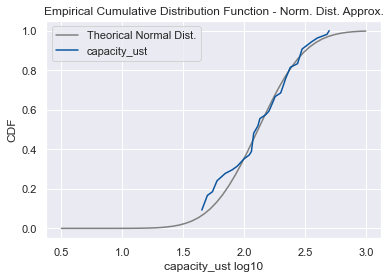

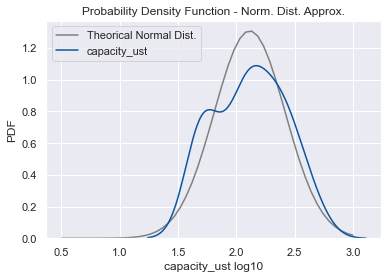

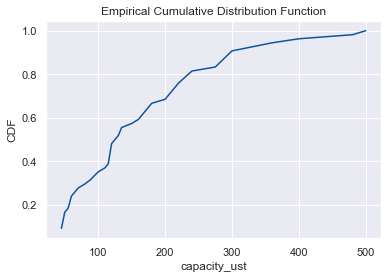

P(x < 100USt):  35.19%
P(x < 150USt):  57.41%
P(x < 200USt):  68.52%
P(x < 250USt):  81.48%
P(x < 300USt):  90.74%
P(x < 350USt):  90.74%
P(x < 400USt):  96.30%


In [619]:
# La distribución lognormal puede resultar particularmente útil para
# modelar datos positivos y que sean aproximadamente simétricos o asimétricos positivos.

# capacity_ust distribution is approximately lognormal,
# which means that the logarithms of the capacity_ust fit a normal distribution.

log_capacity_ust = np.log10(df_clean['capacity_ust'])
mean = log_capacity_ust.mean()
std = log_capacity_ust.std()
print({'mean':mean, 'std':std})

# Make a norm object with mean and std deviation of capacity_ust
from scipy.stats import norm
from empiricaldist import Cdf
dist = norm(mean, std)

# To see whether the distribution of capacity_ust is well modeled by a lognormal distribution,
# we'll compare its CDF of the logarithm data to a normal dist. with the same mean and standard deviation.

# Comparing CDFs
xs = np.linspace(0.5, 3)
ys = dist.cdf(xs)
plt.plot(xs, ys, color='gray', label='Theorical Normal Dist.')
Cdf.from_seq(log_capacity_ust).plot(label='capacity_ust')
plt.title('Empirical Cumulative Distribution Function - Norm. Dist. Approx.')
plt.xlabel('capacity_ust log10')
plt.ylabel('CDF')
plt.legend()
plt.show()

# Comparing PDFs
xs = np.linspace(0.5, 3)
ys = dist.pdf(xs)
plt.plot(xs, ys, color='gray', label='Theorical Normal Dist.')
sns.kdeplot(log_capacity_ust, label='capacity_ust')
plt.title('Probability Density Function - Norm. Dist. Approx.')
plt.xlabel('capacity_ust log10')
plt.ylabel('PDF')
plt.legend()
plt.show()

# Know the probability to get values <= x
ecdf_capacity_ust = Cdf.from_seq(df_clean['capacity_ust'])
ecdf_capacity_ust.plot()
plt.title(f'Empirical Cumulative Distribution Function')
plt.xlabel('capacity_ust')
plt.ylabel('CDF')
plt.show()

# En este dataset, cuál es la probabilidad de encontrar grúas AllTerrain con capacidad de carga menor a 100 USt?
print('P(x < 100USt): ', '{:.2%}'.format(ecdf_capacity_ust(100)))
# En este dataset, cuál es la probabilidad de encontrar grúas AllTerrain con capacidad de carga menor a 150 USt?
print('P(x < 150USt): ', '{:.2%}'.format(ecdf_capacity_ust(150)))
# En este dataset, cuál es la probabilidad de encontrar grúas AllTerrain con capacidad de carga menor a 200 USt?
print('P(x < 200USt): ', '{:.2%}'.format(ecdf_capacity_ust(200)))
# En este dataset, cuál es la probabilidad de encontrar grúas AllTerrain con capacidad de carga menor a 250 USt?
print('P(x < 250USt): ', '{:.2%}'.format(ecdf_capacity_ust(250)))
# En este dataset, cuál es la probabilidad de encontrar grúas AllTerrain con capacidad de carga menor a 300 USt?
print('P(x < 300USt): ', '{:.2%}'.format(ecdf_capacity_ust(300)))
# En este dataset, cuál es la probabilidad de encontrar grúas AllTerrain con capacidad de carga menor a 350 USt?
print('P(x < 350USt): ', '{:.2%}'.format(ecdf_capacity_ust(350)))
# En este dataset, cuál es la probabilidad de encontrar grúas AllTerrain con capacidad de carga menor a 400 USt?
print('P(x < 400USt): ', '{:.2%}'.format(ecdf_capacity_ust(400)))

{'mean': 3.3026803681383203, 'std': 0.001690740232019402}


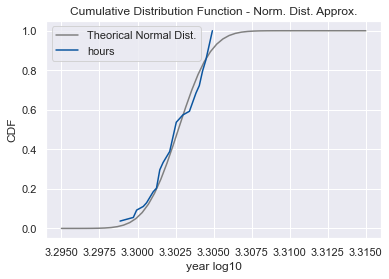

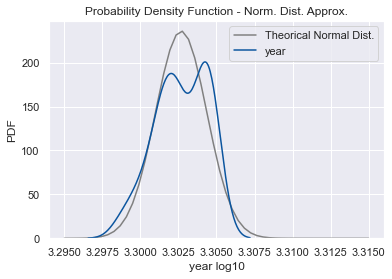

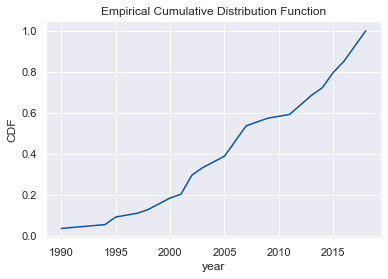

P(x < 2000):  18.52%
P(x < 2005):  38.89%
P(x < 2010):  57.41%
P(x < 2015):  79.63%
P(x < 2020):  100.00%


In [620]:
# La distribución lognormal puede resultar particularmente útil para
# modelar datos positivos y que sean aproximadamente simétricos o asimétricos positivos.

# year distribution is approximately lognormal,
# which means that the logarithms of the year fit a normal distribution.

log_year = np.log10(df_clean['year'])
mean = log_year.mean()
std = log_year.std()
print({'mean':mean, 'std':std})

# Make a norm object with mean and std deviation of hours
from scipy.stats import norm
from empiricaldist import Cdf
dist = norm(mean, std)

# To see whether the distribution of hours is well modeled by a lognormal distribution,
# we'll compare its CDF of the logarithm data to a normal dist. with the same mean and standard deviation.

# Comparing CDFs
xs = np.linspace(3.295, 3.315)
ys = dist.cdf(xs)
plt.plot(xs, ys, color='gray', label='Theorical Normal Dist.')
Cdf.from_seq(log_year).plot(label='hours')
plt.title('Cumulative Distribution Function - Norm. Dist. Approx.')
plt.xlabel('year log10')
plt.ylabel('CDF')
plt.legend()
plt.show()

# Comparing PDFs
xs = np.linspace(3.295, 3.315)
ys = dist.pdf(xs)
plt.plot(xs, ys, color='gray', label='Theorical Normal Dist.')
sns.kdeplot(log_year, label='year')
plt.title('Probability Density Function - Norm. Dist. Approx.')
plt.xlabel('year log10')
plt.ylabel('PDF')
plt.legend()
plt.show()

# Know the probability to get values <= x
ecdf_year = Cdf.from_seq(df_clean['year'])
ecdf_year.plot()
plt.title(f'Empirical Cumulative Distribution Function')
plt.xlabel('year')
plt.ylabel('CDF')
plt.show()

# En este dataset, cuál es la probabilidad de encontrar grúas AllTerrain con año de fabricación por debajo de 2000?
print('P(x < 2000): ', '{:.2%}'.format(ecdf_year(2000)))
# En este dataset, cuál es la probabilidad de encontrar grúas AllTerrain con año de fabricación por debajo de 2005?
print('P(x < 2005): ', '{:.2%}'.format(ecdf_year(2005)))
# En este dataset, cuál es la probabilidad de encontrar grúas AllTerrain con año de fabricación por debajo de 2010?
print('P(x < 2010): ', '{:.2%}'.format(ecdf_year(2010)))
# En este dataset, cuál es la probabilidad de encontrar grúas AllTerrain con año de fabricación por debajo de 2015?
print('P(x < 2015): ', '{:.2%}'.format(ecdf_year(2015)))
# En este dataset, cuál es la probabilidad de encontrar grúas AllTerrain con año de fabricación por debajo de 2020?
print('P(x < 2020): ', '{:.2%}'.format(ecdf_year(2020)))

{'mean': 3.8282799666399967, 'std': 0.3407087293263968}


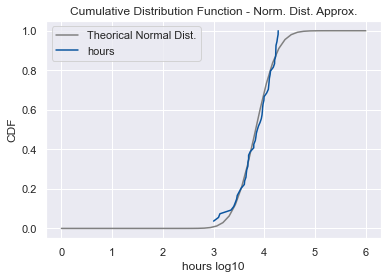

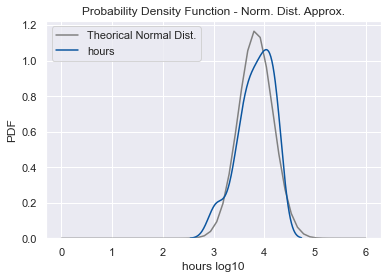

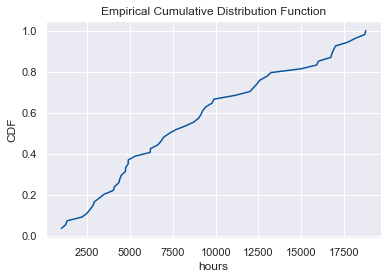

P(x < 2,500horas):  11.11%
P(x < 5,000horas):  37.04%
P(x < 7,500horas):  50.00%
P(x < 10,000horas):  66.67%
P(x < 12,500horas):  74.07%
P(x < 15,000horas):  81.48%


In [621]:
# La distribución lognormal puede resultar particularmente útil para
# modelar datos positivos y que sean aproximadamente simétricos o asimétricos positivos.

# hours distribution is approximately lognormal,
# which means that the logarithms of the hours fit a normal distribution.

log_hours = np.log10(df_clean['hours'])
mean = log_hours.mean()
std = log_hours.std()
print({'mean':mean, 'std':std})

# Make a norm object with mean and std deviation of hours
from scipy.stats import norm
from empiricaldist import Cdf
dist = norm(mean, std)

# To see whether the distribution of hours is well modeled by a lognormal distribution,
# we'll compare its CDF of the logarithm data to a normal dist. with the same mean and standard deviation.

# Comparing CDFs
xs = np.linspace(0, 6)
ys = dist.cdf(xs)
plt.plot(xs, ys, color='gray', label='Theorical Normal Dist.')
Cdf.from_seq(log_hours).plot(label='hours')
plt.title('Cumulative Distribution Function - Norm. Dist. Approx.')
plt.xlabel('hours log10')
plt.ylabel('CDF')
plt.legend()
plt.show()

# Comparing PDFs
xs = np.linspace(0, 6)
ys = dist.pdf(xs)
plt.plot(xs, ys, color='gray', label='Theorical Normal Dist.')
sns.kdeplot(log_hours, label='hours')
plt.title('Probability Density Function - Norm. Dist. Approx.')
plt.xlabel('hours log10')
plt.ylabel('PDF')
plt.legend()
plt.show()

# Know the probability to get values <= x
ecdf_hours = Cdf.from_seq(df_clean['hours'])
ecdf_hours.plot()
plt.title(f'Empirical Cumulative Distribution Function')
plt.xlabel('hours')
plt.ylabel('CDF')
plt.show()

# En este dataset, cuál es la probabilidad de encontrar grúas AllTerrain con horómetro menor a 2,500 horas?
print('P(x < 2,500horas): ', '{:.2%}'.format(ecdf_hours(2500)))
# En este dataset, cuál es la probabilidad de encontrar grúas AllTerrain con horómetro menor a 5,000 horas?
print('P(x < 5,000horas): ', '{:.2%}'.format(ecdf_hours(5000)))
# En este dataset, cuál es la probabilidad de encontrar grúas AllTerrain con horómetro menor a 7,500 horas?
print('P(x < 7,500horas): ', '{:.2%}'.format(ecdf_hours(7500)))
# En este dataset, cuál es la probabilidad de encontrar grúas AllTerrain con horómetro menor a 10,000 horas?
print('P(x < 10,000horas): ', '{:.2%}'.format(ecdf_hours(10000)))
# En este dataset, cuál es la probabilidad de encontrar grúas AllTerrain con horómetro menor a 12,500 horas?
print('P(x < 12,500horas): ', '{:.2%}'.format(ecdf_hours(12500)))
# En este dataset, cuál es la probabilidad de encontrar grúas AllTerrain con horómetro menor a 15,000 horas?
print('P(x < 15,000horas): ', '{:.2%}'.format(ecdf_hours(15000)))

{'mean': 5.626388497975023, 'std': 0.3632532570573308}


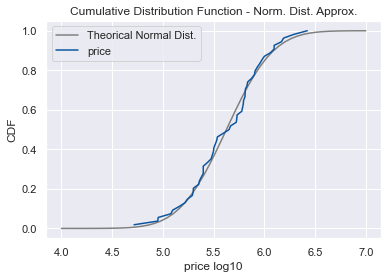

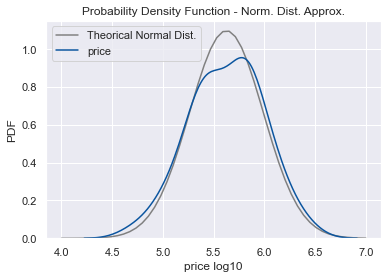

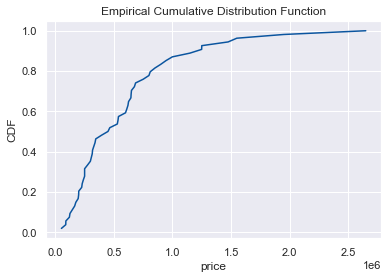

P(x < $150,000):  11.11%
P(x < $250,000):  31.48%
P(x < $500,000):  51.85%
P(x < $750,000):  75.93%
P(x < $1,000,000):  87.04%
P(x < $1,150,000):  88.89%
P(x < $1,500,000):  94.44%


In [622]:
# La distribución lognormal puede resultar particularmente útil para
# modelar datos positivos y que sean aproximadamente simétricos o asimétricos positivos.

# price distribution is approximately lognormal,
# which means that the logarithms of the price fit a normal distribution.

log_price = np.log10(df_clean['price'])
mean = log_price.mean()
std = log_price.std()
print({'mean':mean, 'std':std})

# Make a norm object with mean and std deviation of price
from scipy.stats import norm
from empiricaldist import Cdf
dist = norm(mean, std)

# To see whether the distribution of price is well modeled by a lognormal distribution,
# we'll compare its CDF of the logarithm data to a normal dist. with the same mean and standard deviation.

# Comparing CDFs
xs = np.linspace(4, 7)
ys = dist.cdf(xs)
plt.plot(xs, ys, color='gray', label='Theorical Normal Dist.')
Cdf.from_seq(log_price).plot(label='price')
plt.title('Cumulative Distribution Function - Norm. Dist. Approx.')
plt.xlabel('price log10')
plt.ylabel('CDF')
plt.legend()
plt.show()

# Comparing PDFs
xs = np.linspace(4, 7)
ys = dist.pdf(xs)
plt.plot(xs, ys, color='gray', label='Theorical Normal Dist.')
sns.kdeplot(log_price, label='price')
plt.title('Probability Density Function - Norm. Dist. Approx.')
plt.xlabel('price log10')
plt.ylabel('PDF')
plt.legend()
plt.show()

# Know the probability to get values <= x
ecdf_price = Cdf.from_seq(df_clean['price'])
ecdf_price.plot()
plt.title(f'Empirical Cumulative Distribution Function')
plt.xlabel('price')
plt.ylabel('CDF')
plt.show()

# En este dataset, cuál es la probabilidad de encontrar grúas AllTerrain con precio menor a $150,000?
print('P(x < $150,000): ', '{:.2%}'.format(ecdf_price(150000)))
# En este dataset, cuál es la probabilidad de encontrar grúas AllTerrain con precio menor a $250,000?
print('P(x < $250,000): ', '{:.2%}'.format(ecdf_price(250000)))
# En este dataset, cuál es la probabilidad de encontrar grúas AllTerrain con precio menor a $500,000?
print('P(x < $500,000): ', '{:.2%}'.format(ecdf_price(500000)))
# En este dataset, cuál es la probabilidad de encontrar grúas AllTerrain con precio menor a $750,000?
print('P(x < $750,000): ', '{:.2%}'.format(ecdf_price(750000)))
# En este dataset, cuál es la probabilidad de encontrar grúas AllTerrain con precio menor a $1,000,000?
print('P(x < $1,000,000): ', '{:.2%}'.format(ecdf_price(1000000)))
# En este dataset, cuál es la probabilidad de encontrar grúas AllTerrain con precio menor a $1,150,000?
print('P(x < $1,150,000): ', '{:.2%}'.format(ecdf_price(1150000)))
# En este dataset, cuál es la probabilidad de encontrar grúas AllTerrain con precio menor a $1,500,000?
print('P(x < $1,500,000): ', '{:.2%}'.format(ecdf_price(1500000)))

# Diferencias estadísticas en los Scatter Plots

In [623]:
# capacity_ust vs price
from scipy.stats import bartlett

a = df_clean[(df_clean['capacity_ust'] >= 22) & (df_clean['capacity_ust'] < 110)]['price']
b = df_clean[(df_clean['capacity_ust'] >= 110) & (df_clean['capacity_ust'] < 170)]['price']
c = df_clean[(df_clean['capacity_ust'] >= 170) & (df_clean['capacity_ust'] < 300)]['price']
d = df_clean[(df_clean['capacity_ust'] >= 300) & (df_clean['capacity_ust'] < 1350)]['price']

stat, p = bartlett(a, b, c, d)
print([np.var(x, ddof=1) for x in [a, b, c, d]])
print('p-value: ',p)

# Since the p-value is less than 0.05, I will not fail to reject the null hypothesis.
# In other words, I have sufficient evidence to say that the groups have different variances.

# By having a statistical difference in the variance, we can be totally sure that
# a linear regression 'capacity_ust-price' will not be an acceptable predictive model.

[33024175459.818718, 64631402637.362656, 72774066287.87878, 507284361111.11115]
p-value:  6.962302950906311e-06


In [624]:
# year vs price
from scipy.stats import bartlett

f = df_clean[(df_clean['year'] >= 1989) & (df_clean['year'] < 2005)]['price']
g = df_clean[(df_clean['year'] >= 2005) & (df_clean['year'] < 2012)]['price']
h = df_clean[(df_clean['year'] >= 2012) & (df_clean['year'] < 2018)]['price']
i = df_clean[(df_clean['year'] >= 2018) & (df_clean['year'] < 2021)]['price']

stat, p = bartlett(f, g, h, i)
print([np.var(x, ddof=1) for x in [f, g, h, i]])
print('p-value: ',p)

# Since the p-value is less than 0.05, I will not fail to reject the null hypothesis.
# In other words, I have sufficient evidence to say that the groups have different variances.

# By having a statistical difference in the variance, we can be totally sure that
# a linear regression 'year-price' will not be an acceptable predictive model.

[28132038788.97059, 412563145439.63196, 163716388790.84967, 177275333333.33334]
p-value:  6.380550855285692e-05


In [625]:
# hours vs price
from scipy.stats import bartlett

k = df_clean[(df_clean['hours'] >= 10) & (df_clean['hours'] < 3015)]['price']
l = df_clean[(df_clean['hours'] >= 3015) & (df_clean['hours'] < 6501)]['price']
m = df_clean[(df_clean['hours'] >= 6501) & (df_clean['hours'] < 11485)]['price']
n = df_clean[(df_clean['hours'] >= 11485) & (df_clean['hours'] < 29915)]['price']

stat, p = bartlett(k, l, m, n)
print([np.var(x, ddof=1) for x in [k, l, m, n]])
print('p-value: ',p)

# Since the p-value is less than 0.05, I will not fail to reject the null hypothesis.
# In other words, I have sufficient evidence to say that the groups have different variances.

# By having a statistical difference in the variance, we can be totally sure that
# a linear regression 'hours-price' will not be an acceptable predictive model.

[81240741333.44444, 308291910875.4121, 444728526813.18677, 48279735294.117645]
p-value:  0.0002767121427652692


# Simple Linear Regression

- Linear Regression with statsmodels smf.ols
- Fits a line to the data that minimizes the Sum of the Squared Residuals (SSR)
- R2 gives us a sense of how accurate is our predictive model


In [626]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [627]:
# Split data into train_test
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_clean, test_size=0.3, random_state=1)

Text(0.5, 1.02, 'Linear Regression Model for Price - Test')

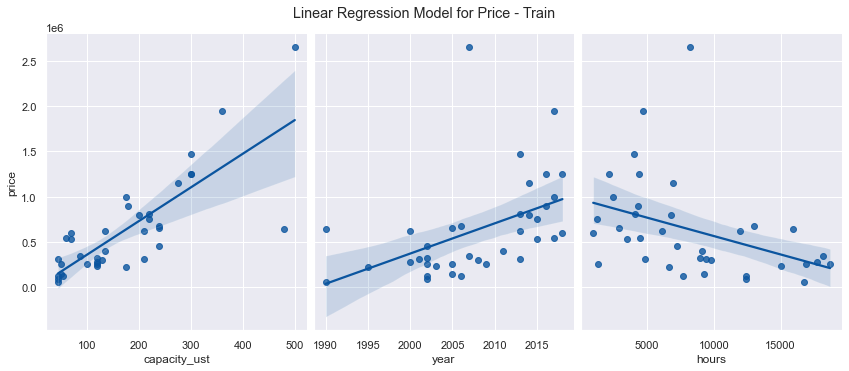

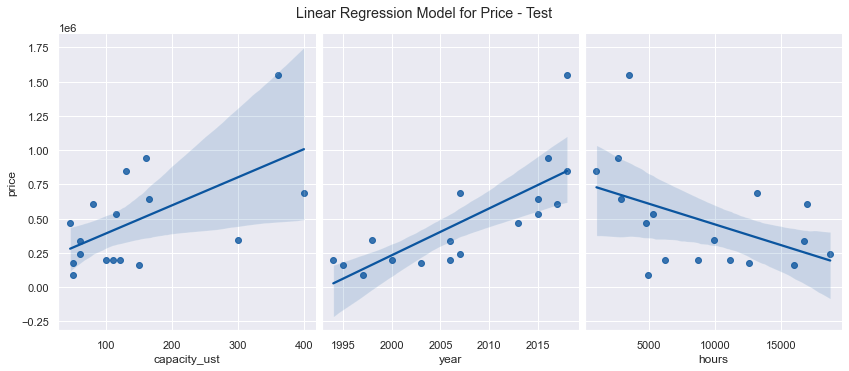

In [628]:
# Regression Plot
sns.pairplot(train, x_vars=['capacity_ust', 'year', 'hours'], y_vars=['price'], height=5, aspect=.8, kind='reg').fig.suptitle('Linear Regression Model for Price - Train', y=1.02)
sns.pairplot(test, x_vars=['capacity_ust', 'year', 'hours'], y_vars=['price'], height=5, aspect=.8, kind='reg').fig.suptitle('Linear Regression Model for Price - Test', y=1.02)

In [629]:
# KPI function
def kpi(Y_train, Y_train_pred, Y_test, Y_test_pred, name=''):
    kpi = pd.DataFrame(columns = ['MAE', 'RMSE', 'Bias'], index=['Train', 'Test'])
    kpi.index.name = name
    kpi.loc['Train', 'MAE'] = 100*np.mean(abs(Y_train - Y_train_pred))/np.mean(Y_train)
    kpi.loc['Train', 'RMSE'] = 100*np.sqrt(np.mean((Y_train - Y_train_pred)**2))/np.mean(Y_train)
    kpi.loc['Train', 'Bias'] = 100*np.mean((Y_train - Y_train_pred))/np.mean(Y_train)
    kpi.loc['Test', 'MAE'] = 100*np.mean(abs(Y_test - Y_test_pred))/np.mean(Y_test)
    kpi.loc['Test', 'RMSE'] = 100*np.sqrt(np.mean((Y_test - Y_test_pred)**2))/np.mean(Y_test)
    kpi.loc['Test', 'Bias'] = 100*np.mean((Y_test - Y_test_pred))/np.mean(Y_test)
    kpi = kpi.astype(float).round(2)
    display(kpi)

In [630]:
# price ~ capacity_ust

# Fit
ols_model = smf.ols('price ~ capacity_ust', data=train).fit()

# Sumary
print(ols_model.summary())

# Pred with train
Y_train = train.price
Y_train_pred = ols_model.predict(train)

# Pred with test
Y_test = test.price
Y_test_pred = ols_model.predict(test)

# KPI
kpi(Y_train, Y_train_pred,
    Y_test, Y_test_pred,
    name='Linear Regression Model - price ~ capacity_ust (%)')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     60.69
Date:                Wed, 28 Sep 2022   Prob (F-statistic):           3.76e-09
Time:                        14:36:59   Log-Likelihood:                -522.15
No. Observations:                  37   AIC:                             1048.
Df Residuals:                      35   BIC:                             1052.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.818e+04   9.97e+04     -0.182   

,MAE,RMSE,Bias
Linear Regression Model - price ~ capacity_ust (%),,,
Train,37.04,51.68,-0.00
Test,55.23,71.43,-7.51


In [631]:
# price ~ year

# Fit
ols_model = smf.ols('price ~ year', data=train).fit()

# Sumary
print(ols_model.summary())

# Pred with train
Y_train = train.price
Y_train_pred = ols_model.predict(train)

# Pred with test
Y_test = test.price
Y_test_pred = ols_model.predict(test)

# KPI
kpi(Y_train, Y_train_pred,
    Y_test, Y_test_pred,
    name='Linear Regression Model - price ~ year (%)')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     9.743
Date:                Wed, 28 Sep 2022   Prob (F-statistic):            0.00360
Time:                        14:36:59   Log-Likelihood:                -536.21
No. Observations:                  37   AIC:                             1076.
Df Residuals:                      35   BIC:                             1080.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.655e+07   2.15e+07     -3.092      0.0

,MAE,RMSE,Bias
Linear Regression Model - price ~ year (%),,,
Train,50.24,75.58,0.00
Test,45.85,55.41,-27.31


In [632]:
# price ~ hours

# Fit
ols_model = smf.ols('price ~ hours', data=train).fit()

# Sumary
print(ols_model.summary())

# Pred with train
Y_train = train.price
Y_train_pred = ols_model.predict(train)

# Pred with test
Y_test = test.price
Y_test_pred = ols_model.predict(test)

# KPI
kpi(Y_train, Y_train_pred,
    Y_test, Y_test_pred,
    name='Linear Regression Model - price ~ hours (%)')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     6.502
Date:                Wed, 28 Sep 2022   Prob (F-statistic):             0.0153
Time:                        14:36:59   Log-Likelihood:                -537.60
No. Observations:                  37   AIC:                             1079.
Df Residuals:                      35   BIC:                             1082.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.731e+05   1.58e+05      6.143      0.0

,MAE,RMSE,Bias
Linear Regression Model - price ~ hours (%),,,
Train,54.44,78.47,-0.00
Test,59.59,72.10,-23.98


In [633]:
# price ~ capacity_ust + year + hours

# Fit
ols_model = smf.ols('price ~ capacity_ust + year + hours', data=train).fit()

# Sumary
print(ols_model.summary())

# Pred with train
Y_train = train.price
Y_train_pred = ols_model.predict(train)

# Pred with test
Y_test = test.price
Y_test_pred = ols_model.predict(test)

# KPI
kpi(Y_train, Y_train_pred,
    Y_test, Y_test_pred,
    name='Linear Regression Model - all (%)')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     53.59
Date:                Wed, 28 Sep 2022   Prob (F-statistic):           8.87e-13
Time:                        14:36:59   Log-Likelihood:                -508.01
No. Observations:                  37   AIC:                             1024.
Df Residuals:                      33   BIC:                             1030.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -6.958e+07   1.42e+07     -4.906   

,MAE,RMSE,Bias
Linear Regression Model - all (%),,,
Train,23.40,35.26,0.00
Test,36.12,52.75,-5.77


# Comparación de Regresión Lineal Simple vs GLM Inverse Gaussian Log y GLM Gamma Log

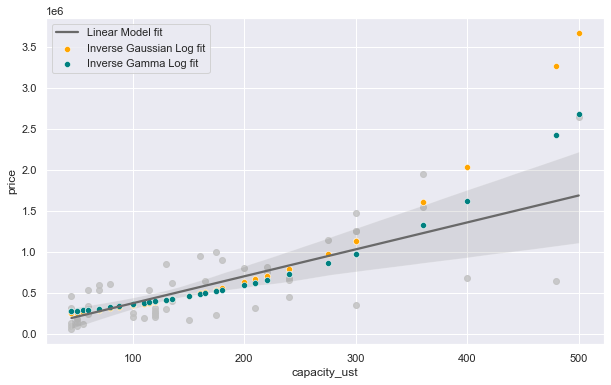

In [634]:
# Price ~ capacity_ust Plot
from statsmodels.formula.api import glm
plt.figure(figsize=(10, 6))

# Inverse Gaussian - log
# Fit
glm_inversegauss_model = glm(formula = 'price ~ capacity_ust', data=df_clean,
                         family=sm.families.InverseGaussian(link=sm.families.links.log())).fit()

# Gamma - log
# Fit
glm_gamma_model = glm(formula = 'price ~ capacity_ust', data=df_clean,
                 family=sm.families.Gamma(link=sm.families.links.log())).fit()

df_clean['fit_price'] = glm_inversegauss_model.fittedvalues
df_clean['fit_price2'] = glm_gamma_model.fittedvalues
sns.regplot(x='capacity_ust', y='price', data=df_clean, fit_reg=True, color='silver',
             line_kws={'color': 'dimgray', 'label': 'Linear Model fit'})
sns.scatterplot(x='capacity_ust', y='fit_price', data=df_clean, color='orange', label='Inverse Gaussian Log fit')
sns.scatterplot(x='capacity_ust', y='fit_price2', data=df_clean, color='teal', label='Inverse Gamma Log fit')
plt.show()

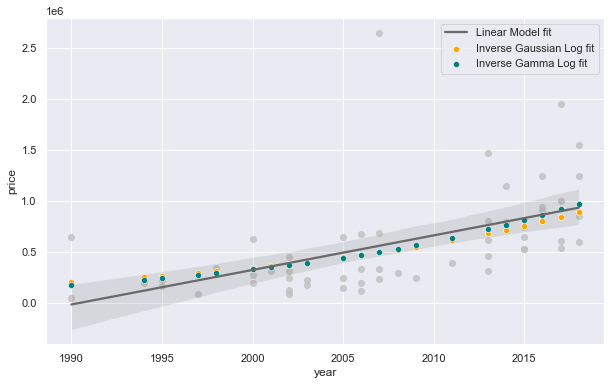

In [635]:
# Price ~ year Plot
from statsmodels.formula.api import glm
plt.figure(figsize=(10, 6))

# Inverse Gaussian - log
# Fit
glm_inversegauss_model = glm(formula = 'price ~ year', data=df_clean,
                         family=sm.families.InverseGaussian(link=sm.families.links.log())).fit()

# Gamma - log
# Fit
glm_gamma_model = glm(formula = 'price ~ year', data=df_clean,
                 family=sm.families.Gamma(link=sm.families.links.log())).fit()

df_clean['fit_price'] = glm_inversegauss_model.fittedvalues
df_clean['fit_price2'] = glm_gamma_model.fittedvalues
sns.regplot(x='year', y='price', data=df_clean, fit_reg=True, color='silver',
             line_kws={'color': 'dimgray', 'label': 'Linear Model fit'})
sns.scatterplot(x='year', y='fit_price', data=df_clean, color='orange', label='Inverse Gaussian Log fit')
sns.scatterplot(x='year', y='fit_price2', data=df_clean, color='teal', label='Inverse Gamma Log fit')
plt.show()

# Generalized Linear Models

- Because of the log link function, the coefficient indicates that a 1-unit increase
- in independent variable causes a factor of e^B increase in dependent variable.
- B is the coef in model summary

In [636]:
import statsmodels.api as sm
from statsmodels.formula.api import glm

In [637]:
# Inverse Gaussian - log

# Fit
glm_inversegauss_model = glm(formula = 'price ~ capacity_ust + year', data=train, family=sm.families.InverseGaussian(link=sm.families.links.log())).fit()

# Summary
print(glm_inversegauss_model.summary())

# Pred with train
Y_train = train.price
Y_train_pred = glm_inversegauss_model.predict(train)

# Pred with test
Y_test = test.price
Y_test_pred = glm_inversegauss_model.predict(test)

# KPI
kpi(Y_train, Y_train_pred,
    Y_test, Y_test_pred,
    name='Inverse Gaussian log - all (%)')

# AIC
print('AIC: ', glm_inversegauss_model.aic)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  price   No. Observations:                   37
Model:                            GLM   Df Residuals:                       34
Model Family:         InverseGaussian   Df Model:                            2
Link Function:                    log   Scale:                      1.9676e-07
Method:                          IRLS   Log-Likelihood:                -488.45
Date:                Wed, 28 Sep 2022   Deviance:                   6.9743e-06
Time:                        14:36:59   Pearson chi2:                 6.69e-06
No. Iterations:                    24   Pseudo R-squ. (CS):             0.9996
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -135.5970     10.761    -12.601   

,MAE,RMSE,Bias
Inverse Gaussian log - all (%),,,
Train,44.50,92.80,-36.17
Test,66.61,154.01,-48.99


AIC:  982.895267460681


In [638]:
# Gamma - log

# Fit
glm_gamma_model = glm(formula = 'price ~ capacity_ust + year', data=train, family=sm.families.Gamma(link=sm.families.links.log())).fit()

# Summary
print(glm_gamma_model.summary())

# Pred with train
Y_train = train.price
Y_train_pred = glm_gamma_model.predict(train)

# Pred with test
Y_test = test.price
Y_test_pred = glm_gamma_model.predict(test)

# KPI
kpi(Y_train, Y_train_pred,
    Y_test, Y_test_pred,
    name='Gamma log - all (%)')

# AIC
print('AIC: ', glm_gamma_model.aic)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  price   No. Observations:                   37
Model:                            GLM   Df Residuals:                       34
Model Family:                   Gamma   Df Model:                            2
Link Function:                    log   Scale:                        0.063787
Method:                          IRLS   Log-Likelihood:                -481.38
Date:                Wed, 28 Sep 2022   Deviance:                       2.1059
Time:                        14:36:59   Pearson chi2:                     2.17
No. Iterations:                    13   Pseudo R-squ. (CS):             0.9999
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -120.0666     11.110    -10.807   

,MAE,RMSE,Bias
Gamma log - all (%),,,
Train,16.04,24.67,-3.18
Test,35.27,66.63,-16.50


AIC:  968.761554755349


# Diagnostics

# Residuals vs. fitted 
- Línea azul = lowess

Para comprobar si el modelo predictivo es el apropiado, en el gráfico debe cumplirse que:
- Los residuales siguen una distribución normal con media cero
- La línea de tendencia azul debe seguir de cerca la línea central de valor 0
- En la escala Y, los valores extremos positivos y negativos deben tener similar magnitud


# Q-Q Plot
- En el eje X, son los cuantiles de una distribución normal teórica
- En el eje Y, son los cuantiles de de los residuales
- Línea roja = normality line

Para comprobar si el modelo predictivo es el apropiado, en el gráfico debe cumplirse que:
- Los residuales siguen una distribución normal
- Los puntos deben seguir la tendencia y estar lo más cercano posible a la línea roja


# Scale-location Plot
- Muestra la raíz cuadrada de los residuales estandarizados frente a los valores ajustados.
- Muestra si el tamaño de los residuales aumentan o disminuyen a lo largo de los valores ajustados

Para comprobar si el modelo predictivo es el apropiado, en el gráfico debe cumplirse que:
- La línea de tendencia azul no debe tener una pendiente positiva o negativa muy pronunciada
- La línea de tendenca azul no debe subir ni bajar significativamente
- La escala del eje Y no debe tener un amplio rango



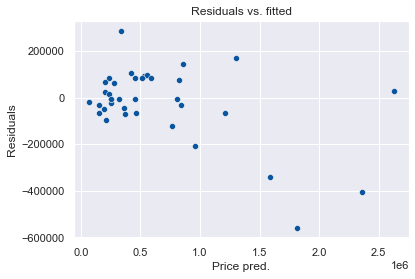

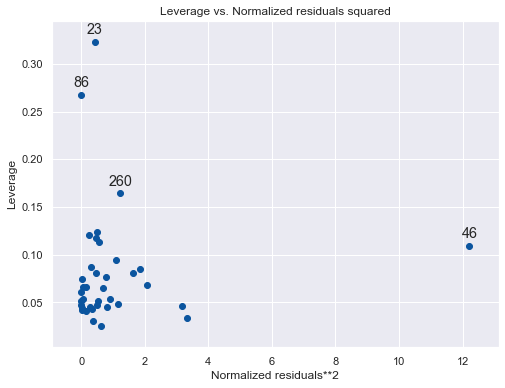

In [639]:
# Residuals vs. fitted plot
residuals = Y_train - Y_train_pred
sns.scatterplot(x=Y_train_pred, y=residuals)
plt.title('Residuals vs. fitted')
plt.xlabel('Price pred.')
plt.ylabel('Residuals')
plt.show()

# Leverage plot
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8, 6))
fig = plot_leverage_resid2(glm_gamma_model, ax=ax)
plt.show()

# Q-Q plot
# stats.probplot(Y_train_pred, dist="norm", plot=pylab)
# pylab.show()

In [640]:
# Predict new data

# Define your values
my_values = [
            {'capacity_ust': 250, 'year': 2011}, # Terex Demag AC250-1 85163
            {'capacity_ust': 220, 'year': 2015}, # Demag AC200 24089
            {'capacity_ust': 80, 'year': 1997}, # Demag AC205 75195
            {'capacity_ust': 140, 'year': 2008}, # Terex AC140 14205
            {'capacity_ust': 200, 'year': 2008}, # Terex AC200-1 33253
            {'capacity_ust': 70, 'year': 2007}, # Libherr LTM1070 059371
            {'capacity_ust': 350, 'year': 2012}, # Terex AC350-6 WMG6315L8CZ010097
]

newdata = pd.DataFrame(columns=['capacity_ust',
                            'year'])

for i in range(0, len(my_values)):
    currentItem = my_values[i]
    newdata.loc[i] = [my_values[i]['capacity_ust'],
                        my_values[i]['year']]
newdata

# Predict your values with the best model
y_test_pred = glm_gamma_model.predict(newdata)
price_predict = pd.DataFrame(y_test_pred)

# Define +/- 20% of price predict
price_min = price_predict*0.90 
price_max = price_predict*1.10

# Report price pred. in a DataFrame
report = pd.concat([newdata, price_predict, price_min, price_max], axis=1)
report.columns.values[2] = 'price_predict'
report.columns.values[3] = 'price_min'
report.columns.values[4] = 'price_max'
report['price_predict'] = report['price_predict'].round(decimals=2)
report['price_min'] = report['price_min'].round(decimals=2)
report['price_max'] = report['price_max'].round(decimals=2)
report.to_csv('report.csv')
report

,capacity_ust,year,price_predict,price_min,price_max
0,250,2011,869225.39,782302.85,956147.93
1,220,2015,959791.60,863812.44,1055770.77
2,80,1997,136410.59,122769.53,150051.65
3,140,2008,390767.95,351691.16,429844.75
4,200,2008,542661.21,488395.09,596927.33
5,70,2007,249432.73,224489.45,274376.00
6,350,2012,1604733.17,1444259.85,1765206.48
